## Regression as Neural Networks Prac 1

### Spring School of Mathematics of Data Science (pre-cource)

***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***


## Various Python imports

In [0]:
import numpy as np
np.random.seed(1337) # for reproducibility
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import set_random_seed
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load the dataset

In [0]:
dataframe = pandas.read_csv("http://www.emmanueldufourq.com/BostonHousePrice.txt", header=None,delim_whitespace=True)
dataset = dataframe.values

## View top 5 records

In [0]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## View all data

In [0]:
dataset

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

## Split the data into features and the class values

In [0]:
X = dataset[:,0:13]
Y = dataset[:,13]

## Check the shapes of the data

In [0]:
X.shape

(506, 13)

In [0]:
Y.shape

(506,)

In [0]:
Y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

## Split the data into training and test data

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

## Create a neural network model

In [0]:
# define the model
def baseline():
    # create model
    model = Sequential()
    # add one fully connected layer
    model.add(Dense(13, input_dim=13, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])
    
    return model

## Add some parameters

In [0]:
estimator = KerasRegressor(build_fn=baseline, epochs=20, batch_size=5, verbose=1)

## Determine the number of trainable parameters

In [0]:
baseline().summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [0]:
history = estimator.fit(X_train, Y_train)



Epoch 1/20
354/354 [==============================] - 1s 2ms/step - loss: 1231.8839 - mean_squared_error: 1231.8839
Epoch 2/20
354/354 [==============================] - 0s 184us/step - loss: 305.7186 - mean_squared_error: 305.7186
Epoch 3/20
354/354 [==============================] - 0s 193us/step - loss: 148.4653 - mean_squared_error: 148.4653
Epoch 4/20
354/354 [==============================] - 0s 187us/step - loss: 118.7357 - mean_squared_error: 118.7357
Epoch 5/20
354/354 [==============================] - 0s 200us/step - loss: 105.5094 - mean_squared_error: 105.5094
Epoch 6/20
354/354 [==============================] - 0s 200us/step - loss: 94.1169 - mean_squared_error: 94.1169
Epoch 7/20
354/354 [==============================] - 0s 212us/step - loss: 86.7461 - mean_squared_error: 86.7461
Epoch 8/20
354/354 [==============================] - 0s 226us/step - loss: 79.9938 - mean_squared_error: 79.9938
Epoch 9/20
354/354 [==============================] - 0s 204us/step - loss: 

## Predict on the test data

In [0]:
prediction = estimator.predict(X_test)

152/152 [==============================] - 0s 266us/step


## Compute the mean squared error

In [0]:
mean_squared_error(Y_test, prediction)

69.53645987476368

## Plot the error over the epochs

In [0]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_squared_error'])
    plt.title('Training Mean Squared Error')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

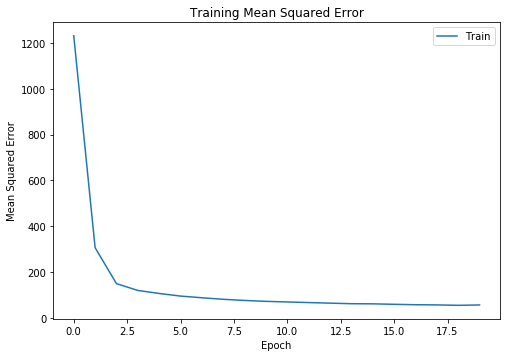

In [0]:
plot_hist(history.history, xsize=8, ysize=12)

# ---------------------------------------------------------
## Task Create a deeper model with more layers

* Here the objective is to create a deeper model to improve the performance compared to the baseline.
* You can add more dense layers.
* You will have to decide on the number of dense layers and the number of units for each one.
* Once you have created your model you can run the remaining cells in this notebook to compare the performance.

In [0]:
def deeper_model():
    # create model

    # YOUR CODE HERE
    
    # Compile model
    
    # YOUR CODE HERE
    return model

## Task: Initialise the model and set some parameters

* Here your objective is to decide on the number of epochs to use
* Replace the "XX" with your value.

In [0]:
estimator = KerasRegressor(build_fn=deeper_model, epochs=XX, batch_size=5, verbose=1)

NameError: ignored

## Check the summary of the model

In [0]:
deeper_model().summary()

## Fit the model

In [0]:
loss = estimator.fit(X_train, Y_train)

## Predict on the test data

In [0]:
prediction = estimator.predict(X_test)

## Evaluate on the test data

In [0]:
mean_squared_error(Y_test, prediction)